<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color="blue">**Quantum Fourier Transform**

In [ ]:
import sympy
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install cirq -q
import cirq
from cirq.contrib.svg import SVGCircuit
print(cirq.__version__)

###### <font color="blue">*Introduction & Formula*

> **Quantum Fourier Transform is the change from one basis (computational) to another (Fourier basis)**

* Quantum Fourier Transform is the inverse Discrete Fourier Transform)

**General formula**

* Remember: <font color="blue">$e^{2\pi i}$ = 1</font> (identity operation), and see why $e^{\pi i}$ = -1 in [this video](https://youtu.be/-AyE1Wpgo3Q) 


* In QFT we change the <font color="blue">$\theta$ = phase in $e^{2\pi i \theta}$</font> = Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩

* The phase $\theta$ is expressed as: <font color="blue">$\theta$ = $\frac{x_n}{2^{k}}$</font> with:

  * <font color="blue">$x_n$ = 0 or 1</font> state
  
  * <font color="blue">$k_n$</font> number of Qubits

* This is expressed in a so-called "controlled-R quantum gate" that **applies a relative phase change to |1>**

* The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i \frac{x_n}{ 2^{k_n}}}\end{array}\right)$</font>

###### <font color="blue">*Movement around Bloch sphere*

https://javafxpert.github.io/grok-bloch/


https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

> **Two important things to remember with QFT:**

**Depending on how many qubits I have, I have the following applications:**
  
* For my first qubit I always apply an Hadamard-gate, 

  * for computational basis = 1, then additionally apply Z-gate = $\pi$
  
* if I have a second qubit, then then I apply an S-gate ($\frac{\pi}{2}$), 
  
* if I have a third qubit, then then I apply an T-gate ($\frac{\pi}{4}$), 
  
* if I have a forth qubit, then then I apply ($\frac{\pi}{8}$) etc.

**In order to represent the above mentioned movement, you need to build the circuit in the following way: If I have more than one qubit, please notice the shift between the denominator (bottom - which remains fixed) and numerator (top - which is shifted by one qubit more)**. See here an example for Quantum Fourier Transform on three qubits:

* <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{n_{x_1}}}+\frac{x_{2}}{2^{n_{x_2}}}+\frac{x_{3}}{2^{n_{x_3}}}\right)}|1\rangle\right)$</font>

* <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}+\frac{x_3}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font>

* <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font>

* etc.

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


###### <font color="blue">*Example*

Understanding the previous chapter: How the qubit moves in the fourier basis when I add more qubits. Here the example is always computational states are = 1

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0775.png)


![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0776.png)


> <font color="blue">For $x_1$ = 1 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ $\Rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = Z-Rotation to -1

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0777.png)


*Results for: $x_1$ = 1, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{2}{4}+\frac{1}{4}\right)}$  = $\mathrm{e}^{1,5 \pi \mathrm{i}}$ Rotation = -i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0778.png)


**Quantum States:** <font color="blue">$\tilde{x_1}$ = 1</font>, <font color="blue">$\tilde{x_2}$ = 1</font>, <font color="blue">$\tilde{x_3}$ = 1</font>. 

And Qubits always: $k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits

> <font color="blue">Qubit 0 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi i 0.875} = \mathrm{e}^{\pi i 1.75}$

> <font color="blue">Qubit 1 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{\pi i 0.25} =$ <font color="blue">$-i$</font>

> <font color="blue">Qubit 2 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{1}{2}}|1\rangle\right)$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font>

###### <font color="blue">*Quantum Fourier Transform with 1 Qubit*


> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> 

* where qubit state <font color="blue">$x_1$ = state 0</font> or <font color="blue">state 1</font> and number of Qubits <font color="blue">$n_{x_1}$ = 1</font> so that $2^{n_{x_1}} = 2^1 = 2$




> <font color="blue">For $x_1$ = 0 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$  $\Rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i} 0}$  = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

> <font color="blue">For $x_1$ = 1 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ $\Rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = Z-Rotation to -1

**Quantum Fourier Transform on 1 Qubit = a Hadamard transform!**

*This is how the linear transformation from a computation basis state to a Fourier state with 1 qubit looks like:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_049.png)

###### <font color="blue">*Quantum Fourier Transform with 2 Qubits*

**For 2 qubits we have 2 different formulas each for $\tilde{x_1}$ and for $\tilde{x_2}$:**



> For <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}+\frac{x_2}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}+\frac{x_2}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$

* If only $\tilde{x_1}$ is activated = 1, then it is a Z-Rotation in the value of $\pi$ = -1

* If only $\tilde{x_2}$ activated = 1, then it is a S-Rotation in the value of $\frac{\pi}{2}$ = i

* If both $\tilde{x_1}$ and $\tilde{x_2}$ are activated = 1, then it is a  Rotation $\pi$ + $\frac{\pi}{2}$, in the value of -i





> For <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_2}$ immer eine Z-Rotation im Wert von $\pi$.


**See here the quantum fourier transform calculation for each qubit in different computational states:**

*Results for 0: $x_1$ = 0, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i} 0}$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}0}|1\rangle\right)$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

*Results for 1: $x_1$ = 0, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{4}\right)}$  = $\mathrm{e}^{\frac{\pi }{2}\mathrm{i}}$ Rotation = i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 2: $x_1$ = 1, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$  = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 3: $x_1$ = 1, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{2}{4}+\frac{1}{4}\right)}$  = $\mathrm{e}^{1,5 \pi \mathrm{i}}$ Rotation = -i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0774.png)


###### <font color="blue">*Quantum Fourier Transform with 3 Qubits*

**For 3 qubits we have 3 different formulas each for $\tilde{x_1}$, for $\tilde{x_2}$ and for $\tilde{x_3}$:**


> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{n_{x_1}}}+\frac{x_{2}}{2^{n_{x_2}}}+\frac{x_{3}}{2^{n_{x_3}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine T-Rotation im Wert von $\frac{\pi}{4}$ = zwischen 1 und i


> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}+\frac{x_3}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_2}$ und $\tilde{x_3}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$ = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_3}$ immer eine Z-Rotation im Wert von $\pi$.

**See here the quantum fourier transform calculation for each qubit in different computational states:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_069.png)

**Quantum States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 0</font>, <font color="blue">$\tilde{x_3}$ = 0</font>. 

And Qubits always: $k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits

> <font color="blue">Qubit 0 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}+\frac{0}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{\pi i 0} =$ <font color="blue">$1$</font>

> <font color="blue">Qubit 1 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $e^{\pi i 0} =$ <font color="blue">$1$</font>

> <font color="blue">Qubit 2 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{0}{2}}|1\rangle\right)$ = $e^{\pi i 0} =$ <font color="blue">$1$</font>

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_070.png)

**Quantum States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 0</font>, <font color="blue">$\tilde{x_3}$ = 1</font>

> <font color="blue">$\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}/2}$ for qubit 0

> <font color="blue">$\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{\pi i 0,25} = -1 $ for qubit 1

> <font color="blue">$\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 1}|1\rangle\right)$ = $e^{\pi i} = -1$ for qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_071.png)

**Quantum States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 1</font>, <font color="blue">$\tilde{x_3}$ = 0</font>

> <font color="blue">$\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}+\frac{0}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}/2}$ = qubit 0

> <font color="blue">$\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $e^{\pi i} = -1 $ = qubit 1

> <font color="blue">$\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = 1$ = qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)

**Quantum States:** <font color="blue">$\tilde{x_1}$ = 0</font>, <font color="blue">$\tilde{x_2}$ = 1</font>, <font color="blue">$\tilde{x_3}$ = 1</font>

> <font color="blue">$\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $e^{2* \pi i (1/4 + 1/8)}$ = $e^{0,75 \pi i}$ = qubit 0

> <font color="blue">$\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{2}}{2}+\frac{x_{3}}{4}\right)}|1\rangle\right)$ = $e^{1,5* \pi i}$ = $e^{i 3*\pi/2}$ =  -i = qubit 1

> <font color="blue">$\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi i x_3}|1\rangle\right)$ = $e^{\pi i 1}$ = -1 (Hadamard negativ) fur qubit 2

For computational state = 111:

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0778.png)


**Quantum States:** <font color="blue">$\tilde{x_1}$ = 1</font>, <font color="blue">$\tilde{x_2}$ = 1</font>, <font color="blue">$\tilde{x_3}$ = 1</font>. 

And Qubits always: $k_1$ = 1 qubit, $k_2$ = 2 qubits, $k_3$ = 3 qubits

> <font color="blue">Qubit 0 = $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{k_1}}+\frac{x_{2}}{2^{k_2}}+\frac{x_{3}}{2^{k_3}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi i 0.875} = \mathrm{e}^{\pi i 1.75}$

> <font color="blue">Qubit 1 = $\tilde{x_2}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{2}}{2^{k_1}}+\frac{x_{3}}{2^{k_2}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{\pi i 0.25} =$ <font color="blue">$-i$</font>

> <font color="blue">Qubit 2 = $\tilde{x_3}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{3}}{2^{k_1}}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i} \frac{1}{2}}|1\rangle\right)$ = $e^{\pi i 1} =$ <font color="blue">$-1$</font>

###### <font color="blue">*Cirq Code for QFT*

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(2)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

**Difference QFT and inverse QFT:**

In [ ]:
# Difference QFT and inverse QFT:
# yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)
# yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

###### *Compactify Original formula for Quantum Fourier Transform*

> *Compactify writing y (note on top how N in the denominator cancels out with new way of writing y)*

*Formula for Quantum Fourier Transform:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

**We need to compactify the original formula, because it doesn't tell us how to build the circuit**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

Problem: this notation doesn't say much on how to build the quantum circuit:

> $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

We need a bit of manipulation y:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_054.png)

https://www.youtube.com/watch?v=pq2jkfJlLmY&t=1784s

So, aus 

<font color="red"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$ 

wird dann: 

<font color="blue"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i \sum_{k=1}^{n} y^{k}}{2^k}}|y_1,y_2,..y_n\rangle$ 

bzw.:

<font color="blue"> $=\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^{n} e^{\frac{2 \pi i x y k}{2^k}}|y_1,y_2,..y_n\rangle$ 


Doing this for $y_1$ and $y_2$ etc, here you can build a circuit from (and without the fraction it looks like a Hadamard transform):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_055.png)

Now you can see it boils down to the different phases when you transform from the computational basis to the Fourier basis: (the question is only how do you apply those phases in the circuit?)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_056.png)

Here with a concrete example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_057.png)

* $e^{\frac{2*\pi*i*5}{2}}$ ist -1 =(e^((2*pi*i*5)/2))

* (e^((2*pi*i*5)/4)) = i

* =(e^((2*pi*i*5)/8)) = -0,707106781 - 0,707106781 i

> =(e^((2*pi*i*5)/2)) gibt hierbei den Azimut an (Horizontale Phase), und (1/√ 8) die Höhe (fur Probability) ???

Going back to the 1 Qubit case with the formula above:

* =(e^((2*pi*i*1)/2)) = -1

* =(e^((2*pi*i*2)/2)) = 1

Siehe hier das Ergebnis (mit der unmodifizierten, alten Formel):

![ddd](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

**Observations before creating the QFT circuit**

First see the notation whenever there is a 1 with a phase. Please note the $2^{n-1 etc.}$ used before for each one:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_062.jpg)

*Second observation: under (2) you can see the phase state of |1111>, which you can rewrite with the product of $e^{2 \pi i[...]}$*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_063.jpg)

**So what do you need to construct a QFT circuit?**

*First a Hamadard, which you can write in the notation below, making Hadamard looking similar to QFT: (please note that one normalization is missing at the last term)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_061.jpg)

> <font color="blue">*UROT is applying a phase (a unitary rotation)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_064.jpg)

**Creating the QFT circuit**

*This is what you need only to create x1:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_065.jpg)

*And this series of gates gives you exactly the terms that you get here (see black arrow). The expression $\frac{x}{2^n}$ (=$\theta$ as we will see later in quantum phase estimation). All of the rotations are applying different phases on to the first qubit.*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_066.jpg)

**Komplettes Circuit**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_067.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_068.png)

* Blog Post: https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

* Qiskit: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

* Cirq: https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

* Youtube: https://youtu.be/rRblvBZkz7A

* IBM Youtube: https://youtu.be/mAHC1dWKNYE

* Classical Discrete Fourier Transform : https://en.m.wikipedia.org/wiki/Discrete_Fourier_transform

* https://physics.stackexchange.com/questions/219581/how-quantum-fourier-transform-equal-to-hadamard-transform-on-4-by-4-matrix

* https://physics.stackexchange.com/questions/56510/how-to-write-the-matrices-for-hadamard-gates-acting-on-differen-qubits?rq=1

https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

https://prod-edxapp.edx-cdn.org/assets/courseware/v1/8f101da9d14cfeec83df9e42a70562bf/c4x/BerkeleyX/CS-191x/asset/chap5.pdf

###### *Quantum Fourier Transform with 3 Qubits*

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 3 Qubits. Results for: $x_1 = 1$, $x_2 = 1$, $x_3 = 1$**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{n_{x_1}}}+\frac{x_{2}}{2^{n_{x_2}}}+\frac{x_{3}}{2^{n_{x_3}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine T-Rotation im Wert von $\frac{\pi}{4}$ = zwischen 1 und i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}+\frac{x_3}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_2}$ und $\tilde{x_3}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$ = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_3}$ immer eine Z-Rotation im Wert von $\pi$.


*Visualisierung eines QFT in 3 Qubits im Computational State |000>:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_050.png)

*QFT mit 3 Qubits in einem Circuit mit S- und T-Gates:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

> **Wenn man im Hadamard + Status beginnt, und wendet dann ein S -Gate an, entspricht das einer Rotation 𝜋/2. Das entspricht 𝜇 und ist i. T ist entsprechend eine Rotation 𝜋/4.**

*Berechnung eines QFT in 3 Qubits im Computational State |011>:*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


Ein Z-Gate ist dann in x1, weil $\pi$\2

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)


https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

**Berechnung eines QFT in 3 Qubits im Computational State |001>:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In die Formel oben eingegeben für ein 3 Qubit mit $x_1=0, x_2=0$ und $x_3=1$ ergibt sich folgendes in umgekehrter Reihenfolge (deswegen muss das Swap-Gate machträglich angewandt werden):

* Qubit $x_1$ (=ohne Swap-Gate wie oben $x_3$): $e^{\frac{2 * \pi * i * 1}{2^{1}}}=-1$ (Z-Gate, weil negativ Hadamard)

* Qubit $x_2$: $e^{\frac{2 * \pi * i * 1}{2^{2}}}=e^{\frac{2 * \pi * i * 1}{4}}=\mathrm{i}$ (=S-Gate)

* Qubit $x_3$ (=$x_1$ im circuit oben): $e^{\frac{2 * \pi * i * 1}{2^{3}}}=e^{\frac{2 * \pi * i * 1}{8}}=e^{\frac{\pi i}{4}}$ (=T-Gate transform)

Controlled U-ROT Gate: immer da, wo control qubit eine 1 ist, wird die entsprechende Rotation übernommen, bei 0 hingegen passiert nix.

Das stimmt überein mit der folgenden geometrischen Darstellung (*3 Qubit Quantum Fourier transformation with 001 in computational state: first state is 180 degree rotated, secind by 90 degree, third by 45 degree from Hadamard + Superposition state - Rotationen werden durch UROT gates bestimmt, und aktiviert überall do, wo control =1 ist*):


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_051.png)

Mit der neuen Formel von unten $e^{\frac{2 \pi i x}{2^n}}$ angewandt für obiges Beispiel: 001 is 1 = x in decimal, und 3 Qubits n= 1,2 und 3:

* Qubit 0: $e^{\frac{2*\pi* i*1}{2^1}}$ = -1 (korrekt siehe oben)

* Qubit 1: $e^{\frac{2*\pi* i*1}{2^2}}$ = $e^{\frac{2*\pi* i*1}{4}}$ = i (korrekt siehe oben)

* Qubit 2: $e^{\frac{2*\pi* i*1}{2^3}}$ = $e^{\frac{2*\pi* i*1}{8}}$= 

  * Müsste sein laut Bloch sphere: $e^{i * {\pi / 4}}$ bzw. $e^{i* (0,25 *\pi)}$

  * Laut Berechnung mit Formel unten: $e^{\frac{2 \pi i 1}{8}}$ = $e^{\frac{\pi i}{4}}$ = $e^{(0,25*\pi) * i}$ = korrekt!!

  * check geometrically [here](https://javafxpert.github.io/grok-bloch/) und [here](https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html)

  * Das ist übrigens das T gate (halbes s gate, was ein halbes z gate ist). siehe unten beispiel bei phase estimation.

**Unten: 5 = 101 in der Fourier Basis**

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_116.png)

* The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. 

* In the state $|\tilde{0}\rangle$, all qubits are in the state $|+\rangle$. 

* In the example above, to encode the state $|\tilde{5}\rangle$ (=101) on n=3 qubits, we rotated the leftmost qubit by $\frac{5}{2^{n}}=\frac{5}{8}$ full turns $\left(\frac{5}{8} \times 2 \pi\right.$ radians). 

* The next qubit is turned double this $\left(\frac{10}{8} \times 2 \pi\right.$ radians, or $\frac{10}{8}$ full turns), this angle is then doubled for the qubit after, and so on.

* **Note the frequency with which each qubit changes. The leftmost qubit (qubit 0 ) in this case has the lowest frequency, and the rightmost the highest.**

* In the Fourier basis the topmost qubit completes one full rotation when counting between 0 and $2^{t}$ .

* To count to a number, $x$ between 0 and $2^{t}$ (t = qubits), we rotate this qubit by $\frac{x}{2^{t}}$ around the z-axis. 

* For the next qubit we rotate by $\frac{2 x}{2^{t}}$, then $\frac{4 x}{2^{t}}$ for the third qubit. In this case x is not 0 or 1, but the decimal number = 5 !!!

> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{8}\right)}|1\rangle\right)$ 

> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{4}{8}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{5}{8}\right)}|1\rangle\right)$= $\mathrm{e}^{1,25 * \pi \mathrm{i}}$ fur qubit 0 (roter Pfeil ist dann zwischen -1 und -i)


**Achtung**: In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ diser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 (spater wichtig fur Phase Estimation).

> x2 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{0,5 * \pi i} $ fur qubit 1




> x3 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = -1$ fur fur qubit 2 

**Weitere Kombinationen**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

###### *Quantum Fourier Transform with 2 Qubits*

**For n = 2 qubits, get the results for: $x_1$ = 0 or 1, $x_2$ = 0 or 1**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}+\frac{x_2}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}+\frac{x_2}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$

* If only $\tilde{x_1}$ is activated, then it is a Z-Rotation in the value of $\pi$ = -1

* If only $\tilde{x_2}$ activated, then it is a S-Rotation in the value of $\frac{\pi}{2}$ = i

* If both $\tilde{x_1}$ and $\tilde{x_2}$ activated, then it is a  Rotation $\pi$ + $\frac{\pi}{2}$, in the value of -i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_2}$ immer eine Z-Rotation im Wert von $\pi$.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_074.jpg)

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(2)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

0: ───H───@───────────
          │
1: ───────@^0.5───H───


###### *Overview*

https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

* the [quantum Fourier transform](https://en.m.wikipedia.org/wiki/Quantum_Fourier_transform) (for short: QFT) is a linear transformation on quantum bits, and is the quantum analogue of the inverse discrete Fourier transform.

> The quantum Fourier transform is the classical discrete Fourier transform applied to the vector of amplitudes of a quantum state

* The quantum Fourier transform is a part of many quantum algorithms, notably Shor's algorithm for factoring and computing the discrete logarithm, the quantum phase estimation algorithm for estimating the eigenvalues of a unitary operator, and algorithms for the hidden subgroup problem. 

* The quantum Fourier transform was invented by Don Coppersmith.

* The quantum Fourier transform can be performed efficiently on a quantum computer, with a particular decomposition into a product of simpler unitary matrices. 

* However, the quantum Fourier transform acts on a quantum state, whereas the classical Fourier transform acts on a vector, so not every task that uses the classical Fourier transform can take advantage of this exponential speedup.

**Prerequisite (Update)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_046.png)

**Formula for Quantum Fourier Transform:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

So the QFT can be implemented with a series of the controlled-R gate as below:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is:

> $\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

Please note that $e^{2 \pi i}$ = 1

y ist fur die computational states, und n=4 zB ist dann 100 der computation state in binary form

y = 0 oder 1. bei 0 verschwindet der ganze term

**Quantum Fourier Transform: Compactify for Circuit Representation**

https://www.youtube.com/watch?v=mAHC1dWKNYE

**Notationshinweise:**

4 ist: 100, 3 ist 11 etc.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_048.png)

###### *Quantum Fourier Transform with 1 Qubit*

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

* see more: https://youtu.be/-AyE1Wpgo3Q with $e^{\pi i}$ = -1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 1 Qubit:**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ 

* <font color="blue">Für x = 0 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i} 0}$  = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">Für x = 1 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = Z-Rotation aus -1

**1 Qubit QFT that does this? - Hadamard gate:**

**One qubit QFT matrix**: $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & \mathrm{e}^{\pi i}\end{array}\right)$, where $\mathrm{e}^{\pi \mathrm{i}}$ = -1. So it is: <font color="blue"> QFT für x=1 = $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & -1\end{array}\right)$

**Compare with Hadamard transform matrix:** 

In quantum computing, the Hadamard gate is a one-qubit rotation, mapping the qubitbasis states $|0\rangle$ and $|1\rangle$ to two **superposition** states with **equal weight of the computational basis** states $|0\rangle$ and $|1\rangle$. Usually the phases are chosen so that

>$
H=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\langle 0|+\frac{|0\rangle-|1\rangle}{\sqrt{2}}\langle 1|
$

in Dirac notation. This corresponds to the transformation matrix

> <font color="blue">$
H_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$

in the $|0\rangle,|1\rangle$ basis, also known as the computational basis. The states $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$ and $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ are known as $|+\rangle$ and $|-\rangle$ respectively, and together constitute the polar basis in quantum computing.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_049.png)

Follow and try movement here for 0: H Gate. For 1: X gate followed bz H gate:

* https://javafxpert.github.io/grok-bloch/

* https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_073.jpg)

https://demonstrations.wolfram.com/QuantumFourierTransformCircuit/

Reminder: QFT Formel:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

**Why Hadamard transform is exactly a 1 qubit Quantum Fourier Transform:** (see result of + for 0 state and - for 1 state)

Siehe oben unter 'Mathermatik": Matrix-Vector-Multiplication (Single Qubit)

> <font color="blue">$H |0\rangle$</font> $ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right] =\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$ <font color="blue">$ \,\,= |+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

> <font color="blue">$H |1\rangle$</font>$ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$ <font color="blue">$ = |-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

$|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ weil <font color="gray">wegen $|0\rangle=\left[\begin{array}{l}1 \\ 0\end{array}\right]$ und $|1\rangle=\left[\begin{array}{l}0 \\ 1\end{array}\right]$ daher:</font> $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 + 0 \\ 0 + 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$

$|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ weil: $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 - 0 \\ 0 - 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

2 im denominator verschwindet hier. 2^n für n=1 qubit. mit 2 oben und unten verschwinden beide.

###### <font color="black">*Cirq Example: Core Code*

https://www.mlq.ai/quantum-programming-google-cirq/

https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

In [ ]:
# Difference QFT and inverse QFT:
# yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)
# yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

https://realpython.com/python-enumerate/

$C R_{j}=C Z^{1 / 2^{j-1}}$

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 

* $S$ entspricht $\frac{\pi}{2}$, also wenn qubit 1 = 1, dann bei qubit 0 das $S$ transform anwenden (0,5)

  * S: The square root of Z gate, equivalent to cirq.Z ** 0.5

  * See: https://quantumai.google/cirq/gates

* $T$ entspricht $\frac{\pi}{4}$

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


In [ ]:
qreg = list(qubits)
qreg

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2)]

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(8)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌───────────────────┐   ┌──────────────────────┐   ┌──────────────────────────┐   ┌──────────────────────┐   ┌───────────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────@───────────────────@───────────────────────@──────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │        │           │                │                   │                       │                          │
1: ───────@^0.5────┼─────H─────┼──────@─────────┼───────@───────────┼──────@────────────────┼──────@───────────────────┼──────@───────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────────────
                   │           │      │         │       │           │      │                │      │        

###### <font color="black">*Cirq Example: Complete Run*

<font color="blue">*Create qubits and operations*

In [ ]:
# Define Qubits
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

qubits = a, b, c

In [ ]:
# Pauli Operators
ops=[cirq.I(a),
     cirq.X(b),
     cirq.X(c)] # flip computational state

circuit=cirq.Circuit(ops)

In [ ]:
# Hadamard Operators
hada=[cirq.H(a),
     cirq.H(b),
     cirq.H(c)]
circuit=cirq.Circuit(hada)

In [ ]:
# Measurement Operators
meas=[cirq.measure(a,b,c)]
circuit=cirq.Circuit(meas)

In [ ]:
# Quantum Fourier Transform Subroutine 

def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

<font color="blue">*Check in computation state*

In [ ]:
qft = cirq.Circuit(ops, meas)
print(qft)

a: ───X───M───
          │
b: ───X───M───
          │
c: ───X───M───


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(qft,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b,c=11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

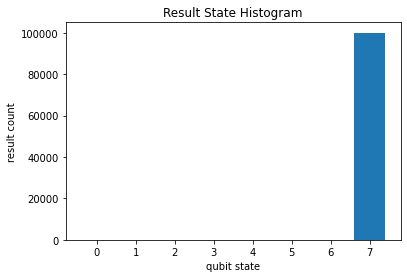

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b,c")

Counter({0: 100000})

In [ ]:
from sympy import Matrix
import math
from sympy.physics.quantum import TensorProduct

m1 = Matrix([[0],[1]])
m2 = Matrix([[1],[0]])
m3 = Matrix([[1],[0]])

a = TensorProduct(m1, m2, m3)
a

Matrix([
[0],
[0],
[0],
[0],
[1],
[0],
[0],
[0]])

<font color="blue">*Quantum Fourier Transform*

In [ ]:
# qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(ops, make_qft(qubits), hada, meas)
print(qft)

                      ┌───────┐
a: ───I───H───@────────@──────────H───────────────M───
              │        │                          │
b: ───X───────@^0.5────┼─────H────@───────H───────M───
                       │          │               │
c: ───X────────────────@^0.25─────@^0.5───H───H───M───
                      └───────┘


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(qft,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b,c=11110011100011111111111111111101111111111111111101111100111111111111111101111011110100100111111111111111110101111110111111001110111101101011111110111110110111011101111111110111011101111011001111110011111111101111111100111111011101111101111111011111111101111101111111111111101111111111101111011111111111110111111111110111110111110111011111111101010111111111111101111111111101110111111011111011101111111000111111111110011110011111101001111101110111111111111111111011011101111111101110111110111111111111111110011111011110111111111111111111111011011111011001011111111111111111111111101100111101110111111011111001011110110111111111101011111111101111111111111101111111101111101111111110011101111111111011110100111011111001010101111111110011101111111101111111100111000011111110111111111110111111111110101111111110011111011111111111101111111111111101111111111011110111111111110111111110001111111110111111111111011011111111111110110111110111011111110111111111111111111111111111111111

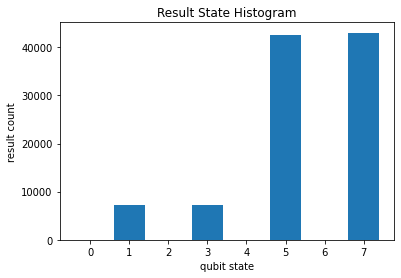

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

Ohne Phase shift / rotation kommt hier 0 raus.

In [ ]:
result.histogram(key="a,b,c")

Counter({1: 7257, 3: 7242, 5: 42484, 7: 43017})

hier muesste man jetzt mit der formel per hand berechnen, ob das ergebnis stimmt fur |011>

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $e^{2* \pi i (1/4 + 1/8)}$ = $e^{0,75 \pi i}$ = qubit 0

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{2}}{2}+\frac{x_{3}}{4}\right)}|1\rangle\right)$ = $e^{1,5* \pi i}$ = $e^{i 3*\pi/2}$ =  -i = qubit 1

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi i x_3}|1\rangle\right)$ = $e^{\pi i 1}$ = -1 (Hadamard negativ) fur qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)

<font color="blue">*Compare with example from superdense coding*:

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1000000111111011100110010000001111001100110100010100111110001111111000010111000011011101001000001100, 0101011011111001110100100101000000001111001110010000010011011101101001110010100100001000111111000111


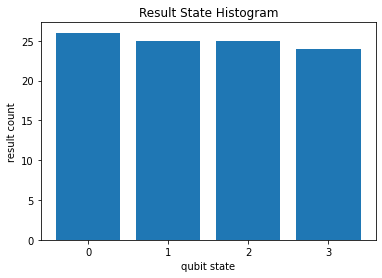

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 26, 1: 25, 2: 25, 3: 24})

###### <font color="black">*Cirq Example: Complete Run II*

<font color="blue">*Create qubits and operations*

In [ ]:
# Define Qubits
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

qubits = a, b

In [ ]:
# Pauli Operators
ops=[cirq.I(a),
     cirq.X(b)]

circuit=cirq.Circuit(ops)

In [ ]:
# Swap Operator
swap=cirq.SWAP(a,b)

In [ ]:
# Hadamard Operators
hada=[cirq.H(a),
      cirq.H(b)]
circuit=cirq.Circuit(hada)

In [ ]:
# Measurement Operators
meas=[cirq.measure(a,b)]
circuit=cirq.Circuit(meas)

In [ ]:
# Quantum Fourier Transform Subroutine 

def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

In [ ]:
# Inverse Quantum Fourier Transform Subroutine 

def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

<font color="blue">*Check in computation state*

In [ ]:
qft = cirq.Circuit(ops, meas)
print(qft)

a: ───I───M───
          │
b: ───X───M───


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(qft,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

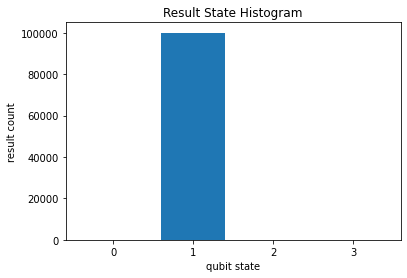

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({1: 100000})

In [ ]:
from sympy import Matrix
import math
from sympy.physics.quantum import TensorProduct

m1 = Matrix([[1],[0]])
m2 = Matrix([[0],[1]])

a = TensorProduct(m1, m2)
a

Matrix([
[0],
[1],
[0],
[0]])

<font color="blue">*Quantum Fourier Transform*

In [ ]:
# qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(ops, make_qft(qubits), make_qft_inverse(qubits), meas)
print(qft)

a: ───I───H───@───────────────@────────H───M───
              │               │            │
b: ───X───────@^0.5───H───H───@^-0.5───────M───


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(qft,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

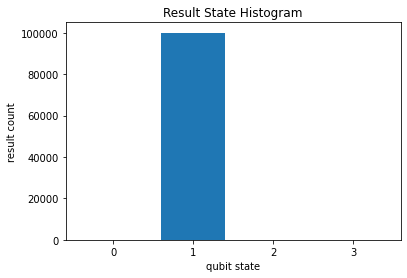

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({1: 100000})

Ohne Phase shift / rotation kommt hier 0 raus.

hier muesste man jetzt mit der formel per hand berechnen, ob das ergebnis stimmt fur |011>

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $e^{2* \pi i (1/4 + 1/8)}$ = $e^{0,75 \pi i}$ = qubit 0

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{2}}{2}+\frac{x_{3}}{4}\right)}|1\rangle\right)$ = $e^{1,5* \pi i}$ = $e^{i 3*\pi/2}$ =  -i = qubit 1

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi i x_3}|1\rangle\right)$ = $e^{\pi i 1}$ = -1 (Hadamard negativ) fur qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)

<font color="blue">*Compare with example from superdense coding*:

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1000000111111011100110010000001111001100110100010100111110001111111000010111000011011101001000001100, 0101011011111001110100100101000000001111001110010000010011011101101001110010100100001000111111000111


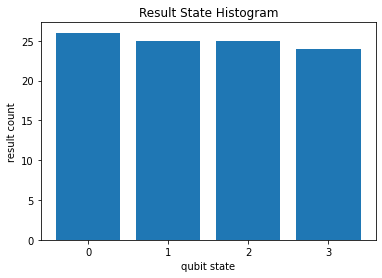

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 26, 1: 25, 2: 25, 3: 24})

###### *Inverse Quantum Fourier Transform ('QFT Dagger')*

In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

# Syntax explanation for list(qubits)[::-1]: list[<start>:<stop>:<step>]
# So, when you do a[::-1], it starts from the end towards the first taking each element. 
# So it reverses a. This is applicable for lists/tuples as well.
# Example: >>> a = '1234' >>> a[::-1] will get you: '4321'

"""Build the last part of the circuit (inverse QFT) for phase estimation."""

# Do the inverse QFT as subroutine in quantum phase estimation
phase_estimator.append(make_qft_inverse(qubits[::-1]))

In [ ]:
# Difference QFT and inverse QFT:
# yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)
# yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

Reminder of QFT:

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$

**Remember: Dagger is a complex conjugate operation!**

QFT inverse (see -2 turning i in -i which is a complex conjugate operation):

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ 


The operator is then (
We have already seen that the Hadamard gate is self-inverse, and the same is clearly true for the SWAP gate; the inverse of the rotations gate $R_k$ is given by):

> The matrix form of inverse QFT operator is: <font color="blue">${R^{\dagger}}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{-2 \pi i / 2^{k}}\end{array}\right)$</font> and compare with QFT operator:  <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

> So for the phase <font color="blue">$\theta$ in $e^{-2\pi i \theta}$</font>, we apply our previous phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

**Example: 1 Qubit, that was in computational state 1**, and is now in Fourier state = -1 = $\mathrm{e}^{\pi \mathrm{i}}$

* <font color="blue">$QFT$ für x = 1 $\Rightarrow$ $\tilde{x}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* <font color="blue">$QFT^{\dagger}$ für $\tilde{x}$ = -1 $\Rightarrow$ $x$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{\tilde{x}}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{-1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1 multipliziert mit $\frac{1}{\sqrt{2}}$ = -0.70710678118 (=eine Bewegung nach unten zum computational state 1 - ?? stimmt das?)

> Remember: $1 / \sqrt{2} \approx(0.71+0 i)$ (Es ist 0i weil kein Anteil i auf der Position liegt. siehe S gate und fourier transform.)